<h1 align="center">Phát hiện Fake News với Python</h1>

### <b>Tổng quan</b>

Trong thời đại bùng nổ thông tin và sự phát triển nhanh chóng của mạng xã hội, việc đặt niềm tin vào mọi thông tin mà chúng ta nghe được trở nên khó khăn hơn bao giờ hết. Bạn có tin tưởng mọi thông tin có trên Internet hay không? Liệu tất cả tin tức có đều là thật?

Tin giả, hay còn được gọi là tin rác, là những thông tin sai lệch được trình bày dưới dạng tin tức với mục đích gây hiểu lầm hoặc tổn hại danh tiếng cá nhân, tổ chức, thậm chí kiếm lợi nhuận thông qua doanh thu quảng cáo. Thuật ngữ này không chỉ giới hạn ở thông tin mạo danh mà còn bao gồm các thông tin sai lệch do vô ý hoặc vô ý thức, cũng như sự lạm dụng của những người có quyền lực.

Tin giả không chỉ ảnh hưởng đến sự cạnh tranh với tin thật mà còn làm suy giảm lòng tin của con người vào tin tức đáng tin cậy. Một số nghiên cứu đã chỉ ra rằng, tin giả thậm chí còn nhận được sự chú ý nhiều hơn so với tin thật.

Cụ thể, trong một nghiên cứu của Viện Công nghệ Massachusetts (MIT) với mạng xã hội Twitter, các chuyên gia đã thống kê có 126.000 câu chuyện được tweet bởi khoảng 3 triệu tài khoản từ năm 2006 đến 2017. Các nhà nghiên cứu Soroush Vosoughi, Deb Roy và Sinan Aral nhận thấy rằng những tin tức giả mạo có tốc độ lây lan nhanh và retweet nhanh hơn nhiều những câu chuyện có thật. Tin tức giả mạo có thể thu hút 1.000 đến 100.000 người dùng Twitter quan tâm trong khoảng thời gian ngắn. Tuy nhiên, các câu chuyện có thật hoặc đã được xác minh phải mất hơn gấp 6 lần khoảng thời gian trên để đạt được 1.500 lượt quan tâm.

Để đối mặt với tin giả, chúng ta cần phải có sự kết hợp của kiến thức và kỹ năng tư duy phản biện. Tuy nhiên, với quy mô lớn và sự đa dạng của tin giả ngày nay, cùng với sự hiểu biết có giới hạn và ảnh hưởng của cảm xúc con người, ta sẽ khó mà đủ tỉnh táo để đưa ra kết luận chính xác.

Trong bối cảnh đó, vai trò của công nghệ và khoa học dữ liệu trở nên quan trọng hơn bao giờ hết. Sự xuất hiện của các thuật toán học máy và trí tuệ nhân tạo mở ra khả năng tự động phát hiện và phân loại tin tức, giúp chúng ta lọc ra thông tin không chính xác một cách nhanh chóng và chính xác hơn. Đây chính là lý do mà nhóm đã quyết định triển khai dự án "Phát hiện Fake News với Python".

### <b>Giới thiệu về dự án</b>

Dự án này có mục tiêu là phát hiện tin tức giả mạo bằng cách sử dụng thư viện `scikit-learn (sklearn)`. Trong quá trình triển khai, chúng ta sẽ xây dựng một `TfidfVectorizer` trên tập dữ liệu của mình. Sau đó, chúng ta sẽ khởi tạo một bộ phân loại thụ động `PassiveAggressiveClassifier` được điều chỉnh sao cho phù hợp với quá trình huấn luyện của mô hình. Cuối cùng, để kiểm tra tính hiệu quả của mô hình, chúng ta sẽ sử dụng `accuracy_score` (chỉ số đánh giá độ chính xác của mô hình máy học) và `confusion_matrix` (một công cụ quan trọng để đánh giá hiệu suất của mô hình phân loại, thường được sử dụng để hiển thị số lượng các dự đoán đúng và sai trong mỗi phân khúc của tập dữ liệu).

Để tiếp tục dự án này, chúng ta cần tìm hiểu sâu hơn về hai khái niệm quan trọng: `TfidfVectorizer` và `PassiveAggressiveClassifier`.

#### 1. TF-IDF Vectorizer là gì?

`TfidfVectorizer` được sử dụng khi ta muốn chuyển đổi một tập hợp các tài liệu thô thành một vectơ các tính năng `TF-IDF`.

`TF`: Term Frequency (Tần suất xuất hiện của từ) là số lần từ xuất hiện trong văn bản. Vì các văn bản có thể có độ dài ngắn khác nhau nên một số từ có thể xuất hiện nhiều lần trong một văn bản dài hơn là một văn bản ngắn. Cụm từ nào có giá trị `TF` cao hơn những cụm từ khác thì có nghĩa là cụm từ đó xuất hiện thường xuyên hơn những cụm từ khác. Ta có công thức tính như sau:

$$tf(t, d) = \dfrac{f(t, d)}{\max{\{f(w, d): w \in d\}}}$$
Trong đó:
- $tf(t, d)$: Tần suất xuất hiện của từ $t$ trong văn bản $d$,
- $f(t, d)$: Số lần xuất hiện của từ $t$ trong văn bản $d$,
- $\max{\{f(w, D): w \in d\}}$: Số lần xuất hiện của từ có số lần xuất hiện nhiều nhất trong văn bản $d$.

`IDF`: Inverse Document Frequency (Tần số nghịch của một từ trong tập văn bản), giúp đánh giá tầm quan trọng của một từ. Khi tính toán `TF`, tất cả các từ được coi như có độ quan trọng bằng nhau. Nhưng một số từ như "is", "of" và "that" thường xuất hiện rất nhiều lần nhưng độ quan trọng là không cao. Vì vậy, chúng ta cần một phương thức bù trừ những từ xuất hiện nhiều lần và tăng độ quan trọng của những từ ít xuất hiện nhưng có ý nghĩa đặc biệt cho một số đoạn văn bản. Ta có công thức tính như sau:

$$idf(t, D) = \log\dfrac{|D|}{|\{d \in D: t \in d\}|}$$
Trong đó:
- $idf(t, D)$: Giá trị $idf$ của từ $t$ trong tập văn bản $D$,
- $|D|$: Tổng số văn bản trong tập $D$,
- $|\{d \in D: t \in d\}|$: Thể hiện số văn bản trong tập $D$ có chừa từ $t$.

Cuối cùng, ta có công thức tính giá trị `TF-IDF` hoàn chỉnh như sau: $$tfidf(t, d, D) = tf(t, d) \times idf(t, D)$$
Khi đó, những từ có giá trị `TF-IDF` cao là những từ xuất hiện nhiều trong văn bản này nhưng xuất hiện ít ở các văn bản khác. Việc này giúp lọc ra những từ phổ biến thông thường và giữ lại những từ có giá trị cao (từ khoá của văn bản).

#### 2. Passive Aggressive Classifier là gì?

`PassiveAggressiveClassifier` (Bộ phân loại tích cực thụ động) thuộc loại thuật toán học máy trực tuyến (online machine learning). Thuật toán này sẽ cho ra kết quả phân loại tương đối chính xác và nó luôn được cập nhật, điều chỉnh trong trường hợp đưa ra các kết quả sai. Không giống như hầu hết các thuật toán khác, nó sẽ không hội tụ, mục đích của nó là tạo ra các bản cập nhật để điều chỉnh mất mát (loss), ít gây ra sự thay đổi về chuẩn (norm) của vectơ trọng số.

Trong mô hình "Phát hiện Fake News", về cơ bản, thuật toán này được sử dụng để phân loại các bài báo hoặc văn bản là thật hay giả dựa trên các đặc trưng `TF-IDF` đã học được từ tập dữ liệu huấn luyện. Mô hình cố gắng cập nhật trọng số của mình dựa trên lỗi phân loại: nếu phân loại đúng, nó thay đổi ít hoặc không thay đổi (passive); nếu phân loại sai, nó cập nhật mạnh mẽ để đối phó với lỗi (aggressive).

### <b>Tập dữ liệu</b>
Tập dữ liệu được sử dụng trong mô hình có tên là `news.csv` (nguồn: `train.csv` - <a href="https://www.kaggle.com/c/fake-news/data">Kaggle</a>), với tổng cộng 20800 bài viết thật giả khác nhau. Trong đó có các đề mục sau:
- `id`: mã định danh duy nhất cho mỗi bài báo
- `title`: tiêu đề của bài báo
- `author`: tác giả của bài báo
- `text`: nội dung của bài báo, có thể không đầy đủ
- `label`: một nhãn để đánh dấu bài báo có thể không đáng tin cậy
    - 1: không đáng tin cậy - FAKE
    - 0: đáng tin cậy - REAL

### <b>Xây dựng mô hình</b>

#### 1. Import những thứ cần thiết

- `pandas`: một thư viện cho phép làm việc với dữ liệu dạng bảng, chúng ta sẽ dùng nó để đọc tập dữ liệu `news.csv` và hiển thị ra các thông tin cần thiết.

- `matplotlib.pyplot`: một mô-đun trong thư viện `matplotlib` (thư viện đồ họa phổ biến trong Python), được sử dụng rộng rãi cho việc vẽ và trực quan hóa dữ liệu dưới dạng đồ thị.

- `seaborn`: một thư viện trực quan hóa dữ liệu trong Python dựa trên `matplotlib`, có thể tạo ra các biểu đồ đẹp mắt và thông tin như biểu đồ phân phối, biểu đồ tần suất và heatmap một cách nhanh chóng và hiệu quả.

- `train_test_split`: một hàm trong `sklearn`, cho phép chia dữ liệu thành hai tập con ngẫu nhiên, một tập dùng để huấn luyện mô hình và một tập dùng để kiểm tra mô hình.

- `TfidfVectorizer`: một lớp trong `sklearn`, cho phép chuyển đổi các văn bản thô thành các vectơ các đặc trưng `TF-IDF`, là một phương pháp đo lường tầm quan trọng của một từ trong một văn bản hoặc một tập hợp các văn bản.

- `PassiveAggressiveClassifier`: một lớp trong `sklearn`, là một thuật toán phân loại trực tuyến, có khả năng cập nhật trọng số của mô hình khi gặp phải các dự đoán sai, phù hợp cho các bài toán có dữ liệu luồng liên tục.

- `accuracy_score` và `confusion_matrix`: hai hàm trong `sklearn`, giúp đánh giá hiệu suất của mô hình phân loại, bằng cách tính toán tỷ lệ dự đoán đúng và ma trận nhầm lẫn, là một bảng thể hiện số lượng các dự đoán đúng và sai theo các nhãn thực tế và dự đoán.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#### 2. Đọc dữ liệu vào DataFrame

Sau khi đã có được các thư viện, hàm và lớp cần thiết, ta cần thực hiện các dòng lệnh đọc và in ra thông tin dữ liệu như sau:

In [2]:
# Đọc dữ liệu vào dataframe
df = pd.read_csv("./news.csv")

# Xem kích thước và vài dòng đầu của dữ liệu
print("Shape:", df.shape)
df.head()

Shape: (20800, 5)


,id,title,author,text,label
0,0,"Iran Retaliates, Plans to Block Americans from...",Adelle Nazarian,Iran has announced that it will prevent United...,0
1,1,"Halloween Is Coming, Vladimir Putin Isn’t",shorty,Photo by Jedimentat44 | CC BY 2.0 I would not ...,1
2,2,Intuitive Astrology: October 30 New Moon 2016,stevew,by Tanaaz \nThe October 30th New Moon falls in...,1
3,3,Donald Trump Reaffirms Support for Warmer Rela...,Alexander Burns,"MECHANICSBURG, Pa. — Donald J. Trump unabas...",0
4,4,US elections don't meet ‘international standar...,admin,US elections don't meet ‘international standar...,1


Chúng ta sẽ xây dựng một DataFrame để xem thống kê về tập hợp các tin giả và tin thật với những thông tin sau: `Total news` (Tổng số tin tức), `Total titles` (Tổng số tiêu đề), `Total authors` (Tổng số tác giả), `Total texts` (Tổng số nội dung).

In [3]:
# Xem thông tin của tập hợp các tin giả và tin thật
fake = df[df["label"] == 1].count()
real = df[df["label"] == 0].count()
df_counts = {
    "": ["FAKE", "REAL"],
    "Total news": [fake["id"], real["id"]],
    "Total titles": [fake["title"], real["title"]],
    "Total authors": [fake["author"], real["author"]],
    "Total texts": [fake["text"], real["text"]],
}
pd.DataFrame(df_counts)

,,Total news,Total titles,Total authors,Total texts
0,FAKE,10413,9855,8482,10374
1,REAL,10387,10387,10363,10387


Thông qua kết quả trên, ta thấy được các tin giả thỉnh thoảng cũng hay thiếu những thông tin như tiêu đề, tác giả hay nội dung. Trong khi đó, các tin thật đều đầy đủ tất cả thông tin, trừ tác giả vì đó có thể là các bài báo được các trang trích dẫn lại hoặc tác giả muốn đăng ẩn danh.

#### 3. Thay đổi và lấy các nhãn của DataFrame

Việc thay đổi nhãn của cột `label` từ số 0 và 1 thành chuỗi `REAL` và `FAKE` nhằm mục đích biểu diễn dữ liệu một cách rõ ràng hơn, vì nhãn `REAL` và `FAKE` có ý nghĩa và dễ hiểu hơn là số 0 và 1.

In [4]:
# Thay đổi các nhãn của dataframe
df["label"] = df["label"].astype("object")
df.loc[(df["label"] == 1), ["label"]] = "FAKE"
df.loc[(df["label"] == 0), ["label"]] = "REAL"

# Xem lại dữ liệu
df.head()

,id,title,author,text,label
0,0,"Iran Retaliates, Plans to Block Americans from...",Adelle Nazarian,Iran has announced that it will prevent United...,REAL
1,1,"Halloween Is Coming, Vladimir Putin Isn’t",shorty,Photo by Jedimentat44 | CC BY 2.0 I would not ...,FAKE
2,2,Intuitive Astrology: October 30 New Moon 2016,stevew,by Tanaaz \nThe October 30th New Moon falls in...,FAKE
3,3,Donald Trump Reaffirms Support for Warmer Rela...,Alexander Burns,"MECHANICSBURG, Pa. — Donald J. Trump unabas...",REAL
4,4,US elections don't meet ‘international standar...,admin,US elections don't meet ‘international standar...,FAKE


Ta thực hiện trích xuất cột `label` từ DataFrame `df` và lưu trữ nó vào biến `labels`. Biến `labels` ở đây sẽ chứa toàn bộ thông tin của cột `label` từ DataFrame.

In [5]:
# Lấy các nhãn từ dataframe
labels = df.label
labels.head()

0    REAL
1    FAKE
2    FAKE
3    REAL
4    FAKE
Name: label, dtype: object

#### 4. Chia bộ dữ liệu thành các tập train và test

Trước hết, chúng ta cần trộn các thông tin về `title` (tiêu đề), `author` (tác giả) và `text` (nội dung) lại thành một chuỗi. Vì như mọi người đã thấy, các tin giả thỉnh thoảng cũng hay thiếu một trong số các thông tin nói trên.

Ta tạo một cột mới trong DataFrame có tên là `combined_info`, sử dụng phương thức `apply` của `pandas` để áp dụng một hàm `lambda` cho mỗi hàng của DataFrame. Trong hàm `lambda` này, thông tin từ các cột `title`, `author` và `text` của mỗi hàng được kết hợp lại thành một đoạn văn bản mới theo định dạng như sau:
<pre>
        Title: [tiêu đề]
        Author: [tác giả]
        Text:
        [nội dung]
</pre>

In [6]:
# Trộn tiêu đề, tác giả và nội dung
df["combined_info"] = df.apply(
    lambda row: f"Title: {row['title']}\nAuthor: {row['author']}\nText:\n{row['text']}",
    axis=1,
)

# Xem lại dữ liệu
df.head()

,id,title,author,text,label,combined_info
0,0,"Iran Retaliates, Plans to Block Americans from...",Adelle Nazarian,Iran has announced that it will prevent United...,REAL,"Title: Iran Retaliates, Plans to Block America..."
1,1,"Halloween Is Coming, Vladimir Putin Isn’t",shorty,Photo by Jedimentat44 | CC BY 2.0 I would not ...,FAKE,"Title: Halloween Is Coming, Vladimir Putin Isn..."
2,2,Intuitive Astrology: October 30 New Moon 2016,stevew,by Tanaaz \nThe October 30th New Moon falls in...,FAKE,Title: Intuitive Astrology: October 30 New Moo...
3,3,Donald Trump Reaffirms Support for Warmer Rela...,Alexander Burns,"MECHANICSBURG, Pa. — Donald J. Trump unabas...",REAL,Title: Donald Trump Reaffirms Support for Warm...
4,4,US elections don't meet ‘international standar...,admin,US elections don't meet ‘international standar...,FAKE,Title: US elections don't meet ‘international ...


Sau đó, ta sử dụng hàm `train_test_split` nhận vào dữ liệu từ cột `combined_info` và nhãn tương ứng từ biến `labels` để chia bộ dữ liệu thành bốn phần: `x_train` (dữ liệu huấn luyện), `x_test` (dữ liệu kiểm thử), `y_train` (nhãn cho dữ liệu huấn luyện), và `y_test` (nhãn cho dữ liệu kiểm thử).

In [7]:
# Chia bộ dữ liệu
x_train, x_test, y_train, y_test = train_test_split(
    df["combined_info"], labels, test_size=0.2, random_state=10
)

Trong đó:

- `test_size=0.2`: Tham số này chỉ định tỷ lệ của dữ liệu được chia thành tập kiểm thử (test set). Trong trường hợp này, 20% của dữ liệu sẽ được sử dụng làm test set.

- `random_state=10`: Tham số này đặt seed cho quá trình tạo số ngẫu nhiên, đảm bảo rằng khi ta chạy đoạn mã này nhiều lần, ta vẫn sẽ nhận được kết quả chia dữ liệu giống nhau. Số 10 ở đây là một giá trị ngẫu nhiên và ta có thể chọn bất kỳ số nào tùy ý.

#### 5. Khởi tạo TfidfVectorizer và thực hiện fit, transform

Trong quá trình xử lý văn bản, chúng ta sử dụng `TfidfVectorizer` để tiền xử lý và chuyển đổi các dữ liệu văn bản thành vectơ `TF-IDF`.

In [8]:
# Khởi tạo TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

# Fit and transform train set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

- Đầu tiên, khởi tạo một đối tượng `TfidfVectorizer` với một số tham số, bao gồm `stop_words="english"` để loại bỏ từ ngữ không quan trọng trong tiếng Anh (ví dụ: "is", "and", "the") và `max_df=0.7` để loại bỏ các từ có tần suất xuất hiện quá cao, hơn 70% văn bản.

- `tfidf_train = tfidf_vectorizer.fit_transform(x_train)`: Thực hiện phương thức `fit_transform` trên tập huấn luyện `x_train`. Phương thức này sẽ học từ tập huấn luyện và biến đổi các văn bản trong `x_train` thành vectơ `TF-IDF`. Kết quả được gán vào biến `tfidf_train`.

- `tfidf_test = tfidf_vectorizer.transform(x_test)`: Sử dụng thông tin đã học từ `x_train` để biến đổi các văn bản trong tập kiểm tra `x_test` thành vectơ `TF-IDF`. Kết quả được gán vào biến `tfidf_test`.

#### 6. Khởi tạo PassiveAggressionClassifier và thực hiện dự đoán

Sau khi đã chuyển đổi văn bản thành vectơ `TF-IDF`, chúng ta sử dụng mô hình `PassiveAggressiveClassifier` để phân loại tin tức thật giả.

In [9]:
# Khởi tạo PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

# Dự đoán trên tập test và tính toán độ chính xác
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(score*100,2)}%")

Accuracy: 97.86%


- Chúng ta khởi tạo một mô hình `PassiveAggressiveClassifier`, với `max_iter` là số lượng lần lặp tối đa cho quá trình huấn luyện.

- `pac.fit(tfidf_train, y_train)`: Ta sử dụng phương thức `fit` để đào tạo mô hình trên tập dữ liệu `tfidf_train` và nhãn tương ứng `y_train`.

- `y_pred = pac.predict(tfidf_test)`: Thực hiện dự đoán trên tập dữ liệu `tfidf_test` và lưu trữ nhãn dự đoán vào biến `y_pred`.

- `score = accuracy_score(y_test, y_pred)`: Ta sử dụng `accuracy_score` để tính toán độ chính xác của mô hình bằng cách so sánh nhãn dự đoán `y_pred` với nhãn thực tế `y_test`.

#### 7. Xây dựng ma trận nhầm lẫn

Sau khi huấn luyện và thử nghiệm mô hình, chúng ta sẽ tiến hành đánh giá hiệu suất của mô hình thông qua ma trận nhầm lẫn (confusion matrix).

Trong phần này, chúng ta sẽ sử dụng thư viện `seaborn` để trực quan hóa ma trận nhầm lẫn dưới dạng heatmap. Heatmap không chỉ cung cấp thông tin về số lượng dự đoán trong mỗi lớp mà còn giúp dễ dàng nhận biết các vùng nơi mô hình thực hiện tốt hoặc có lỗi.

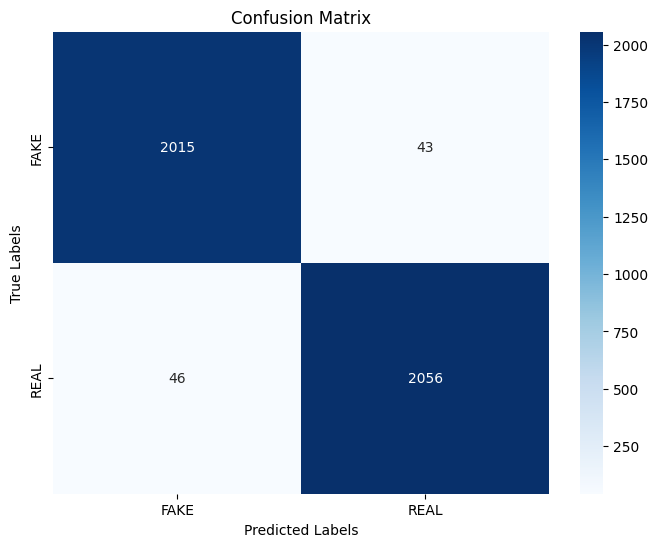

In [10]:
# Xây dựng confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=["FAKE", "REAL"])

# Xây dựng heatmap cho confusion matrix
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", xticklabels=["FAKE", "REAL"], yticklabels=["FAKE", "REAL"]
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#### 8. Thử nghiệm dự đoán với nội dung được nhập vào

Cuối cùng, chúng ta sẽ thử nghiệm dự đoán tính xác thực của các bài viết trong thời gian gần đây. Mục tiêu là kiểm tra khả năng của mô hình trong việc phân loại tin tức là `REAL` hoặc `FAKE` và hiểu rõ hơn về cơ sở của những dự đoán này.

Đầu tiên, chúng ta sẽ thử nghiệm với một bài báo từ trang uy tín bất kỳ. Sau đó, áp dụng quy trình tiền xử lý tương tự như đã thực hiện với bộ dữ liệu kiểm thử, bao gồm việc chuyển đổi nội dung thành định dạng `TF-IDF`. Sau đó ta sử dụng mô hình `PassiveAggressiveClassifier` để dự đoán xem nội dung đó là `REAL` hay `FAKE`.

In [11]:
from newspaper import Article

url = input("Nhập url của bài báo")
article = Article(url)
article.download()
article.parse()

text_input = f"Title: {article.title}\nAuthor: {', '.join(article.authors)}\nText:\n{article.text}"
text_tfidf = tfidf_vectorizer.transform([text_input])
label_pred = pac.predict(text_tfidf)

print(f"Kết quả dự đoán: {label_pred}")
print(" ".join(text_input.split(" ")[:100]) + " ...")

Kết quả dự đoán: ['REAL']
Title: FPT’s software exports climb to $1B in 2023
Author: Minh Son
Text:
FPT’s overseas revenues from IT services topped US$1 billion in 2023 after doubling from 2020.

The tech giant’s revenues came mainly from Japan, the U.S. and the Asia – Pacific, with all three markets growing by over 30%, Japan by 54% thanks to bigger spending on digital transformation.

FPT’s IT services moved up the technology value chain, with 50% of revenues coming from digital transformation.

Growth was also seen in new technologies such as cloud services, which accounted for 40% of revenues from digital transformation services, AI - data analysis (12%) and RPA ...


Để hiểu rõ hơn về quyết định của mô hình, chúng ta sẽ thực hiện trực quan hóa các đặc trưng `TF-IDF` từ nội dung đã nhập. Điều này được thực hiện bằng cách chuyển đổi vectơ `TF-IDF` thành DataFrame và sau đó vẽ đồ thị cho 10 đặc trưng có điểm số `TF-IDF` cao nhất.

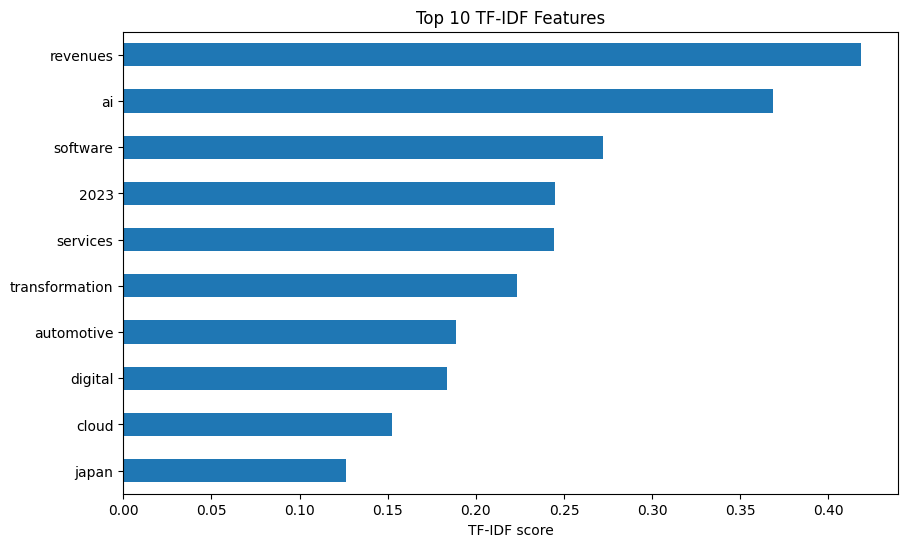

In [12]:
# Chuyển đổi vectơ TF-IDF thành DataFrame để trực quan hóa
df_tfidf = pd.DataFrame(
    text_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out()
)

# Vẽ đồ thị cho 10 đặc trưng có điểm TF-IDF cao nhất
top_tfidf_features = df_tfidf.sum().sort_values(ascending=False).head(10)
top_tfidf_features.plot(kind="barh", figsize=(10, 6))
plt.title("Top 10 TF-IDF Features")
plt.xlabel("TF-IDF score")
plt.gca().invert_yaxis()
plt.show()

Tương tự, ta cũng sẽ thực hiện dự đoán với nội dung giả mạo được nhập vào thủ công.

In [13]:
title = input("Nhập tiêu đề")
author = input("Nhập tác giả")
text = input("Nhập nội dung")

text_input = f"Title: {title}\nAuthor: {author}\nText:\n{text}"
text_tfidf = tfidf_vectorizer.transform([text_input])
label_pred = pac.predict(text_tfidf)

print(f"Kết quả dự đoán: {label_pred}")
print(" ".join(text_input.split(" ")[:100]) + " ...")

Kết quả dự đoán: ['FAKE']
Title: The Enigmatic Allure of Tam: A Portrait of Inner and Outer Beauty
Author: ChatGPT
Text:
Tam is truly a remarkable individual, and his handsomeness is just one facet of his incredible personality. From the moment you meet him, it's impossible not to be captivated by his striking good looks. With chiseled features, expressive eyes that seem to hold a universe of depth, and a smile that could light up the darkest of rooms, Tam possesses a magnetic charm that draws people towards him effortlessly. However, it's not just his physical appearance that makes him stand out; it's his inner beauty that truly ...


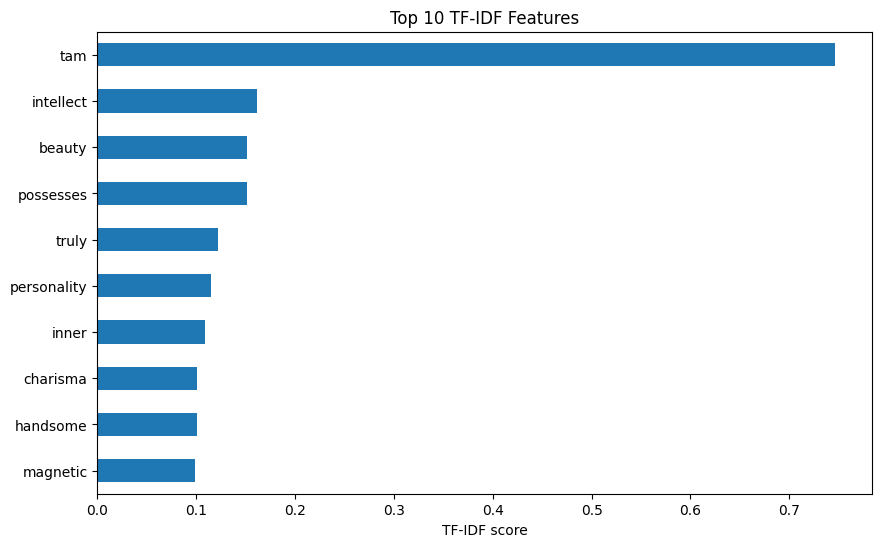

In [14]:
# Chuyển đổi vectơ TF-IDF thành DataFrame để trực quan hóa
df_tfidf = pd.DataFrame(
    text_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out()
)

# Vẽ đồ thị cho 10 đặc trưng có điểm TF-IDF cao nhất
top_tfidf_features = df_tfidf.sum().sort_values(ascending=False).head(10)
top_tfidf_features.plot(kind="barh", figsize=(10, 6))
plt.title("Top 10 TF-IDF Features")
plt.xlabel("TF-IDF score")
plt.gca().invert_yaxis()
plt.show()